# **Flow Chart**
#### **Coding**
Get the RA and DEC for all messier objects

**"Implement at least 2-3 meaningful classes with multiple methods"**
#### **Math**
Make a function that can calculate the sky position at a user defined time at a user defined longitude and latitude
    Start with M31 and confirm answers
#### **Plots**
Plot of hight of object for this day
Plot of hight of object over the course of the year
Pull pretty images of the object
#### **AI tom foolery**
pass our function to an ai
allow for a user to send a message to the ai that contains the previous inputs
#### **Streamlit?!?!?!?!?!**
Convert to a py script and make a web interface for our function

# **Imports**

In [1]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time
from datetime import datetime, timedelta
import astropy.units as u
import matplotlib.pyplot as plt
from PIL import Image
from urllib.request import Request, urlopen
import numpy as np

# **Object Definition**

In [2]:
class AstroObject:
    def __init__(self, name, ra_deg, dec_deg, image_url=None):
        self.name = name
        self.ra = ra_deg
        self.dec = dec_deg
        self.image_url = image_url

    def get_coords(self):
        return (self.ra, self.dec)

In [3]:
messier_1 = AstroObject("Crab Nebula", 83.633, 22.0145,"https://upload.wikimedia.org/wikipedia/commons/0/00/Crab_Nebula.jpg")
messier_2 = AstroObject("M2 Globular Cluster", 323.3625, -0.8233,"https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/Messier2_-_HST_-_Potw1913a.jpg/1280px-Messier2_-_HST_-_Potw1913a.jpg")
messier_3 = AstroObject("M3 Globular Cluster", 205.5483, 28.3773,"https://upload.wikimedia.org/wikipedia/commons/thumb/6/6a/Messier3_-_HST_-_Potw1914a.jpg/1280px-Messier3_-_HST_-_Potw1914a.jpg")
messier_4 = AstroObject("Spider Globular Cluster", 245.8967, -26.5258,"https://upload.wikimedia.org/wikipedia/commons/thumb/9/90/Globular_star_cluster_Messier_4.jpg/1280px-Globular_star_cluster_Messier_4.jpg")
messier_5 = AstroObject("Rose Cluster", 229.6383, 2.0810,"https://upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Messier_5_-_HST.jpg/1280px-Messier_5_-_HST.jpg")
messier_6 = AstroObject("Butterfly Cluster", 265.025, -32.2167,"https://upload.wikimedia.org/wikipedia/commons/7/7f/M6a.jpg")
messier_7 = AstroObject("Ptolemy Cluster", 268.4633, -34.7928,"https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/The_star_cluster_Messier_7.jpg/1280px-The_star_cluster_Messier_7.jpg")
messier_8 = AstroObject("Lagoon Nebula", 270.9042, -24.3867,"https://upload.wikimedia.org/wikipedia/commons/7/76/LagoonHunterWilson.jpg")
messier_9 = AstroObject("M9 Globular Cluster", 259.7992, -18.5163, "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Globular_cluster_Messier_9_%28captured_by_the_Hubble_Space_Telescope%29.tif/lossy-page1-768px-Globular_cluster_Messier_9_%28captured_by_the_Hubble_Space_Telescope%29.tif.jpg")
messier_10 = AstroObject("M10 Globular Cluster", 254.2871, -4.0995,"https://upload.wikimedia.org/wikipedia/commons/thumb/6/67/Messier_10_Hubble_WikiSky.jpg/1280px-Messier_10_Hubble_WikiSky.jpg")
messier_11 = AstroObject("Wild Duck Cluster", 282.775, -6.2667,"https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Eso1430a.jpg/1280px-Eso1430a.jpg")
messier_12 = AstroObject("M12 Globular Cluster", 251.8092, -1.9485,"https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/M12_Hubble.jpg/1280px-M12_Hubble.jpg")
messier_13 = AstroObject("Great Hercules Cluster", 250.4217, 36.4599,"https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Messier_13_Hubble_WikiSky.jpg/1280px-Messier_13_Hubble_WikiSky.jpg")
messier_14 = AstroObject("M14 Globular Cluster", 264.4008, -3.2459,"https://upload.wikimedia.org/wikipedia/commons/b/b2/Messier_object_014.jpg")
messier_15 = AstroObject("Great Pegasus Cluster", 322.493, 12.167,"https://upload.wikimedia.org/wikipedia/commons/thumb/6/65/Messier_15_Hubble_WikiSky.jpg/1280px-Messier_15_Hubble_WikiSky.jpg")
messier_16 = AstroObject("Eagle Nebula", 274.700, -13.817,"https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Eagle_Nebula_from_ESO.jpg/1280px-Eagle_Nebula_from_ESO.jpg")
messier_17 = AstroObject("Omega Nebula", 275.1083, -16.1767,"https://upload.wikimedia.org/wikipedia/commons/thumb/9/90/The_star_formation_region_Messier_17.jpg/1280px-The_star_formation_region_Messier_17.jpg")
messier_18 = AstroObject("Black Swan Cluster", 274.975, -17.1333,"https://upload.wikimedia.org/wikipedia/commons/c/c8/Messier18.jpg")
messier_19 = AstroObject("M19 Globular Cluster", 255.6571, -26.2679,"https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Messier_19_Hubble_WikiSky.jpg/1280px-Messier_19_Hubble_WikiSky.jpg")
messier_20 = AstroObject("Trifid Nebula", 270.5958, -23.0300,"https://upload.wikimedia.org/wikipedia/commons/f/f3/Trifid.nebula.arp.750pix.jpg")
messier_21 = AstroObject("Webb Cross Cluster", 271.150, -22.500,"https://upload.wikimedia.org/wikipedia/commons/2/28/Messier_object_021.jpg")
messier_22 = AstroObject("Great Sagittarius Cluster", 279.0996, -23.9048,"https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Messier_22_Hubble_WikiSky.jpg/1280px-Messier_22_Hubble_WikiSky.jpg")
messier_23 = AstroObject("M23 Open Cluster", 269.200, -19.0167,"https://upload.wikimedia.org/wikipedia/commons/6/63/Messier_object_023.jpg")
messier_24 = AstroObject("Sagittarius Star Cloud", 274.250, -18.550,"https://upload.wikimedia.org/wikipedia/commons/c/c4/Messier_24_Colombari_crop_invert.jpg")
messier_25 = AstroObject("M25 Open Cluster", 277.900, -19.250,"https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Messier_object_025.jpg/1280px-Messier_object_025.jpg")
messier_26 = AstroObject("M26 Open Cluster", 281.300, -9.400,"https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Messier_26.jpg/1280px-Messier_26.jpg")
messier_27 = AstroObject("Dumbbell Nebula", 299.9013, 22.7211,"https://upload.wikimedia.org/wikipedia/commons/thumb/e/e8/M27_-_Dumbbell_Nebula.jpg/1280px-M27_-_Dumbbell_Nebula.jpg")
messier_28 = AstroObject("M28 Globular Cluster", 276.1371, -24.8698,"https://upload.wikimedia.org/wikipedia/commons/thumb/f/f6/Nebulous%2C_but_no_nebula_Messier_28.jpg/1280px-Nebulous%2C_but_no_nebula_Messier_28.jpg")
messier_29 = AstroObject("Cooling Tower Cluster", 305.9833, 38.5233,"https://upload.wikimedia.org/wikipedia/commons/a/aa/Messier_29.jpg")
messier_30 = AstroObject("Jellyfish Cluster", 325.0921, -23.1799,"https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/Messier_30_Hubble_WikiSky.jpg/1280px-Messier_30_Hubble_WikiSky.jpg")
messier_31 = AstroObject("Andromeda Galaxy", 10.6846, 41.2692,"https://upload.wikimedia.org/wikipedia/commons/thumb/9/98/Andromeda_Galaxy_%28with_h-alpha%29.jpg/1280px-Andromeda_Galaxy_%28with_h-alpha%29.jpg")
messier_32 = AstroObject("Andromeda Satellite M32", 10.6742, 40.8653,"https://upload.wikimedia.org/wikipedia/commons/8/83/M32_Lanoue.png")
messier_33 = AstroObject("Triangulum Galaxy", 23.4583, 30.6602,"https://upload.wikimedia.org/wikipedia/commons/thumb/6/64/VST_snaps_a_very_detailed_view_of_the_Triangulum_Galaxy.jpg/1280px-VST_snaps_a_very_detailed_view_of_the_Triangulum_Galaxy.jpg")
messier_34 = AstroObject("Spiral Cluster", 40.525, 42.7667,"https://upload.wikimedia.org/wikipedia/commons/7/7e/M34_2mass_atlas.jpg")
messier_35 = AstroObject("Shoe Buckle Cluster", 92.275, 24.350,"https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/M35atlas.jpg/1280px-M35atlas.jpg")
messier_36 = AstroObject("Pinwheel Cluster", 84.050, 34.1344,"https://upload.wikimedia.org/wikipedia/commons/3/3d/M36a.jpg")
messier_37 = AstroObject("Salt and Pepper Cluster", 88.075, 32.5506,"https://upload.wikimedia.org/wikipedia/commons/4/46/M37a.jpg")
messier_38 = AstroObject("Starfish Cluster", 82.175, 35.855,"https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/M38_Open_Cluster.jpg/1280px-M38_Open_Cluster.jpg")
messier_39 = AstroObject("Pyramid Cluster", 322.925, 48.4333,"https://upload.wikimedia.org/wikipedia/commons/thumb/6/67/M39atlas.jpg/677px-M39atlas.jpg")
messier_40 = AstroObject("Winnecke 4", 185.5521, 58.0831,"https://upload.wikimedia.org/wikipedia/commons/b/ba/Messier_object_40.jpg")
messier_41 = AstroObject("Little Beehive Cluster", 101.500, -20.7667,"https://upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Messier_041_2MASS.jpg/960px-Messier_041_2MASS.jpg")
messier_42 = AstroObject("Great Orion Nebula", 83.8221, -5.3911,"https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Orion_Nebula_-_Hubble_2006_mosaic_18000.jpg/1280px-Orion_Nebula_-_Hubble_2006_mosaic_18000.jpg")
messier_43 = AstroObject("De Mairan Nebula", 83.900, -5.2667,"https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/M43_HST.jpg/1280px-M43_HST.jpg")
messier_44 = AstroObject("Beehive Cluster", 130.100, 19.9833,"https://upload.wikimedia.org/wikipedia/commons/thumb/9/94/Messier_44_2018.jpg/1280px-Messier_44_2018.jpg")
messier_45 = AstroObject("Pleiades", 56.850, 24.1167,"https://upload.wikimedia.org/wikipedia/commons/4/4b/Bob_Star_-_M45_Carranza_Field_%28by%29.jpg")
messier_46 = AstroObject("M46 Open Cluster", 115.450, -14.8167,"https://upload.wikimedia.org/wikipedia/commons/0/0b/M46a.jpg")
messier_47 = AstroObject("M47 Open Cluster", 114.150, -14.500,"https://upload.wikimedia.org/wikipedia/commons/5/55/M47a.jpg")
messier_48 = AstroObject("M48 Open Cluster", 123.425, -5.750,"https://upload.wikimedia.org/wikipedia/commons/6/66/M48a.jpg")
messier_49 = AstroObject("M49 Galaxy", 187.4446, 8.0006,"https://upload.wikimedia.org/wikipedia/commons/thumb/2/29/Messier_49_Hubble_WikiSky.jpg/1280px-Messier_49_Hubble_WikiSky.jpg")
messier_50 = AstroObject("Heart Shaped Cluster", 105.800, -8.3333,"https://upload.wikimedia.org/wikipedia/commons/3/3b/M50a.jpg")
messier_51 = AstroObject("Whirlpool Galaxy", 202.4696, 47.1953,"https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Messier51_sRGB.jpg/1280px-Messier51_sRGB.jpg")
messier_52 = AstroObject("Scorpion Cluster", 351.050, 61.5833,"https://upload.wikimedia.org/wikipedia/commons/b/bc/M52atlas.jpg")
messier_53 = AstroObject("M53 Globular Cluster", 198.2304, 18.1682,"https://upload.wikimedia.org/wikipedia/commons/5/5f/Globular_Cluster_M53.jpg")
messier_54 = AstroObject("M54 Globular Cluster", 283.7638, -30.4799,"https://upload.wikimedia.org/wikipedia/commons/7/75/Messier54.jpg")
messier_55 = AstroObject("Specter Cluster", 295.9988, -30.9648,"https://upload.wikimedia.org/wikipedia/commons/a/a2/Messier55.jpg")
messier_56 = AstroObject("M56 Globular Cluster", 289.1483, 30.1835,"https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/M56-LRGB.jpg/1280px-M56-LRGB.jpg")
messier_57 = AstroObject("Ring Nebula", 283.3963, 33.0292,"https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/M57_The_Ring_Nebula.JPG/1215px-M57_The_Ring_Nebula.JPG")
messier_58 = AstroObject("M58 Galaxy", 189.4313, 11.8181,"https://upload.wikimedia.org/wikipedia/commons/b/b0/M58s_%28visible%29.jpg")
messier_59 = AstroObject("M59 Galaxy", 190.5096, 11.6470,"https://upload.wikimedia.org/wikipedia/commons/thumb/8/8f/Messier59_-_HST_-_Potw1921a.jpg/1280px-Messier59_-_HST_-_Potw1921a.jpg")
messier_60 = AstroObject("M60 Galaxy", 190.9150, 11.5525,"https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/Messier_60_Hubble_WikiSky.jpg/1280px-Messier_60_Hubble_WikiSky.jpg")
messier_61 = AstroObject("M61 Galaxy", 185.4788, 4.4736,"https://upload.wikimedia.org/wikipedia/commons/thumb/2/23/Messier61_-_ESO_-_Potw1901a.tif/lossy-page1-882px-Messier61_-_ESO_-_Potw1901a.tif.jpg")
messier_62 = AstroObject("Flickering Globular", 255.3025, -30.1124,"https://upload.wikimedia.org/wikipedia/commons/e/e4/Messier_object_062.jpg")
messier_63 = AstroObject("Sunflower Galaxy", 198.9554, 42.0292,"https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/M63s.jpg/1280px-M63s.jpg")
messier_64 = AstroObject("Black Eye Galaxy", 194.1821, 21.6828,"https://upload.wikimedia.org/wikipedia/commons/c/c4/Blackeyegalaxy.jpg")
messier_65 = AstroObject("Leo Triplet M65", 169.7329, 13.0922,"https://upload.wikimedia.org/wikipedia/commons/4/47/M65.jpg")
messier_66 = AstroObject("Leo Triplet M66", 170.0625, 12.9917, "https://upload.wikimedia.org/wikipedia/commons/thumb/7/7c/Phot-33c-03-fullres.jpg/1280px-Phot-33c-03-fullres.jpg")
messier_67 = AstroObject("Golden Eye Cluster", 132.825, 11.8167,"https://upload.wikimedia.org/wikipedia/commons/7/74/Messier_object_067.jpg")
messier_68 = AstroObject("M68 Globular Cluster", 189.8667, -26.7441,"https://upload.wikimedia.org/wikipedia/commons/0/0f/Messier_object_068.jpg")
messier_69 = AstroObject("M69 Globular Cluster", 277.8463, -32.3481,"https://upload.wikimedia.org/wikipedia/commons/a/af/Messier_object_069.jpg")
messier_70 = AstroObject("M70 Globular Cluster", 280.8033, -32.2921,"https://upload.wikimedia.org/wikipedia/commons/e/ec/Messier70.jpg")
messier_71 = AstroObject("Angelfish Cluster", 298.4438, 18.7792,"https://upload.wikimedia.org/wikipedia/commons/8/8c/Messier71.jpg")
messier_72 = AstroObject("M72 Globular Cluster", 313.3654, -12.5373,"https://upload.wikimedia.org/wikipedia/commons/b/b4/Messier72.jpg")
messier_73 = AstroObject("M73 Asterism", 314.725, -12.6333,"https://upload.wikimedia.org/wikipedia/commons/c/c2/Messier_073_2MASS.jpg")
messier_74 = AstroObject("Phantom Galaxy", 24.1742, 15.7836,"https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Messier_74_by_HST.jpg/1280px-Messier_74_by_HST.jpg")
messier_75 = AstroObject("M75 Globular Cluster", 301.5200, -21.9212,"https://upload.wikimedia.org/wikipedia/commons/5/53/Messier75.jpg")
messier_76 = AstroObject("Little Dumbbell Nebula", 25.600, 51.5753,"https://upload.wikimedia.org/wikipedia/commons/f/f0/M76-RL5-DDmin-Gamma-LRGB_883x628.jpg")
messier_77 = AstroObject("Cetus A Galaxy", 40.6696, -0.0133,"https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Messier_77_spiral_galaxy_by_HST.jpg/1280px-Messier_77_spiral_galaxy_by_HST.jpg")
messier_78 = AstroObject("M78 Nebula", 86.6946, 0.0139,"https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Messier_78.jpg/1280px-Messier_78.jpg")
messier_79 = AstroObject("M79 Globular Cluster", 81.0442, -24.5243,"https://upload.wikimedia.org/wikipedia/commons/a/ae/M79a.jpg")
messier_80 = AstroObject("M80 Globular Cluster", 244.2600, -22.9761,"https://upload.wikimedia.org/wikipedia/commons/thumb/6/6a/A_Swarm_of_Ancient_Stars_-_GPN-2000-000930.jpg/1280px-A_Swarm_of_Ancient_Stars_-_GPN-2000-000930.jpg")
messier_81 = AstroObject("Bode Galaxy", 148.8883, 69.0653,"https://upload.wikimedia.org/wikipedia/commons/thumb/8/8b/M81.jpg/1280px-M81.jpg")
messier_82 = AstroObject("Cigar Galaxy", 148.9675, 69.6797,"https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/JPEG_M82_Cigar_Galaxyjn.jpg/1280px-JPEG_M82_Cigar_Galaxyjn.jpg")
messier_83 = AstroObject("Southern Pinwheel Galaxy", 204.2538, -29.8658,"https://upload.wikimedia.org/wikipedia/commons/thumb/8/85/M83_-_Southern_Pinwheel.jpg/1280px-M83_-_Southern_Pinwheel.jpg")
messier_84 = AstroObject("M84 Galaxy", 186.2654, 12.8870,"https://upload.wikimedia.org/wikipedia/commons/7/7a/Messier_84_nucleus_Hubble.jpg")
messier_85 = AstroObject("M85 Galaxy", 186.3500, 18.1911,"https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/Messier_85_Hubble_WikiSky.jpg/1280px-Messier_85_Hubble_WikiSky.jpg")
messier_86 = AstroObject("M86 Galaxy", 186.5488, 12.9461,"https://upload.wikimedia.org/wikipedia/commons/thumb/e/e5/Messier_86_Hubble_WikiSky.jpg/1280px-Messier_86_Hubble_WikiSky.jpg")
messier_87 = AstroObject("Virgo A Galaxy", 187.7058, 12.3911,"https://upload.wikimedia.org/wikipedia/commons/thumb/0/07/Messier_87_Hubble_WikiSky.jpg/1280px-Messier_87_Hubble_WikiSky.jpg")
messier_88 = AstroObject("M88 Galaxy", 187.9967, 14.4206,"https://upload.wikimedia.org/wikipedia/commons/thumb/7/7c/M88s.jpg/1280px-M88s.jpg")
messier_89 = AstroObject("M89 Galaxy", 188.9158, 12.5564,"https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/Messier89_-_HST_-_Potw1902a.tif/lossy-page1-1199px-Messier89_-_HST_-_Potw1902a.tif.jpg")
messier_90 = AstroObject("M90 Galaxy", 189.2075, 13.1628,"https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Messier90_-_SDSS_DR14_%28panorama%29.jpg/1280px-Messier90_-_SDSS_DR14_%28panorama%29.jpg")
messier_91 = AstroObject("M91 Galaxy", 188.8600, 14.4964,"https://upload.wikimedia.org/wikipedia/commons/thumb/9/9d/M91s.jpg/1280px-M91s.jpg")
messier_92 = AstroObject("M92 Globular Cluster", 259.281, 43.1359,"https://upload.wikimedia.org/wikipedia/commons/c/cb/Globular_Cluster_M92.JPG")
messier_93 = AstroObject("Critter Cluster", 116.150, -23.8667,"https://upload.wikimedia.org/wikipedia/commons/f/f0/Messier_object_093.jpg")
messier_94 = AstroObject("Crocodile Eye Galaxy", 192.7213, 41.1206,"https://upload.wikimedia.org/wikipedia/commons/1/1c/Messier_94.jpg")
messier_95 = AstroObject("M95 Galaxy", 160.9904, 11.7039,"https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/The_VLT_goes_lion_hunting.jpg/1280px-The_VLT_goes_lion_hunting.jpg")
messier_96 = AstroObject("M96 Galaxy", 161.6904, 11.8200,"https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/NGC_3368_ESO.jpg/1280px-NGC_3368_ESO.jpg")
messier_97 = AstroObject("Owl Nebula", 168.6988, 55.0190,"https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/M97-stargazer-obs.jpg/1252px-M97-stargazer-obs.jpg")
messier_98 = AstroObject("M98 Galaxy", 183.4513, 14.9005,"https://upload.wikimedia.org/wikipedia/commons/2/21/M-98.jpg")
messier_99 = AstroObject("St Catherine Wheel Galaxy", 184.7067, 14.4164,"https://upload.wikimedia.org/wikipedia/commons/e/eb/M99.jpg")
messier_100 = AstroObject("Mirror Galaxy", 185.7288, 15.8225,"https://upload.wikimedia.org/wikipedia/commons/thumb/9/94/Messier_100_and_Supernova_SN_2006X.jpg/1280px-Messier_100_and_Supernova_SN_2006X.jpg")
messier_101 = AstroObject("Pinwheel Galaxy", 210.8025, 54.3492,"https://upload.wikimedia.org/wikipedia/commons/thumb/c/c5/M101_hires_STScI-PRC2006-10a.jpg/1280px-M101_hires_STScI-PRC2006-10a.jpg")
messier_102 = AstroObject("Spindle Galaxy", 226.6229, 55.7633,"https://upload.wikimedia.org/wikipedia/commons/thumb/9/91/Ngc5866_hst_big.png/1280px-Ngc5866_hst_big.png")
messier_103 = AstroObject("M103 Open Cluster", 23.300, 60.700,"https://upload.wikimedia.org/wikipedia/commons/0/06/Messier_object_103.jpg")
messier_104 = AstroObject("Sombrero Galaxy", 189.9975, -11.6231,"https://upload.wikimedia.org/wikipedia/commons/thumb/5/5e/M104_ngc4594_sombrero_galaxy_hi-res.jpg/1280px-M104_ngc4594_sombrero_galaxy_hi-res.jpg")
messier_105 = AstroObject("M105 Galaxy", 161.9567, 12.5817,"https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Messier105_-_HST_-_Potw1901a.jpg/1280px-Messier105_-_HST_-_Potw1901a.jpg")
messier_106 = AstroObject("M106 Galaxy", 184.7396, 47.3039,"https://upload.wikimedia.org/wikipedia/commons/thumb/2/2d/Messier_106_visible_and_infrared_composite.jpg/1280px-Messier_106_visible_and_infrared_composite.jpg")
messier_107 = AstroObject("Crucifix Cluster", 248.1329, -13.0538,"https://upload.wikimedia.org/wikipedia/commons/a/a9/Messier_object_107.jpg")
messier_108 = AstroObject("Surfboard Galaxy", 167.8792, 55.6742,"https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/Messier108_-_SDSS_DR_14_%28panorama%29.jpg/1280px-Messier108_-_SDSS_DR_14_%28panorama%29.jpg")
messier_109 = AstroObject("Vacuum Cleaner Galaxy", 179.4000, 53.3744,"https://upload.wikimedia.org/wikipedia/commons/thumb/3/3d/Messier109_-_SDSS_DR14_%28panorama%29.jpg/1280px-Messier109_-_SDSS_DR14_%28panorama%29.jpg")
messier_110 = AstroObject("Andromeda Satellite M110", 10.0921, 41.6853,"https://upload.wikimedia.org/wikipedia/commons/f/f7/Messier_object_110.jpg")

# **Functions**

In [4]:
def calculate_altitude(obj, obs_date, obs_time, latitude_deg, longitude_deg, utc_offset):

    # Split date and time (optional, but explicit)
    # date_part, time_part = obs_time_str.split(" ")

    # Recombine safely and parse
    local_dt = datetime.strptime(
        f"{obs_date} {obs_time}",
        "%Y-%m-%d %H:%M:%S"
    )

    # Convert local time → UTC
    utc_dt = local_dt - timedelta(hours=utc_offset)
    time_obs = Time(utc_dt)

    # Get object coordinates
    ra, dec = obj.get_coords()

    sky_object = SkyCoord(
        ra=ra * u.deg,
        dec=dec * u.deg,
        frame="icrs"
    )

    location = EarthLocation(
        lat=latitude_deg * u.deg,
        lon=longitude_deg * u.deg,
        height=0 * u.m
    )

    altaz = sky_object.transform_to(
        AltAz(obstime=time_obs, location=location)
    )
    
    return altaz.alt.degree

In [5]:
def plot_altitude_24hr(obj, date_str, latitude_deg, longitude_deg, utc_offset):

    start_local = datetime.strptime(date_str + " 12:00:00",
                                    "%Y-%m-%d %H:%M:%S")

    minutes = np.arange(0, 24*60 + 1, 5)
    hours = minutes / 60
    altitudes = []

    for m in minutes:
        current_local = start_local + timedelta(minutes=int(m))
        date_part = current_local.strftime("%Y-%m-%d")
        time_part = current_local.strftime("%H:%M:%S")
        alt = calculate_altitude(
            obj,
            date_part,
            time_part,
            latitude_deg,
            longitude_deg,
            utc_offset
        )

        altitudes.append(alt)

    fig, ax = plt.subplots()

    ax.plot(hours, altitudes)

    ax.set_xlim(0, 24)
    ax.set_ylim(-90, 90)

    ax.set_xlabel("Local Time")
    ax.set_ylabel("Altitude (degrees)")
    ax.set_title(f"{obj.name} Altitude Over 24 Hours")

# ---- Custom 12-hour clock ticks ----
    tick_positions = np.arange(0, 25, 1)

    tick_labels = []
    for h in tick_positions:
        hour_24 = (12 + h) % 24  # start at 12 PM
        if hour_24 == 0:
            hour_12 = 12
            suffix = "AM"
        elif hour_24 < 12:
            hour_12 = hour_24
            suffix = "AM"
        elif hour_24 == 12:
            hour_12 = 12
            suffix = "PM"
        else:
            hour_12 = hour_24 - 12
            suffix = "PM"

        tick_labels.append(f"{hour_12} {suffix}")
    ax.axhline(y=0, color='black')
    ax.set_xticks(tick_positions)
    ax.set_xticklabels(tick_labels, rotation=45)

    plt.tight_layout()
    plt.show()

In [6]:
def plot_altitude_year(obj, obs_date, latitude_deg, longitude_deg, utc_offset, step_days=7):   

    base_dt = datetime.strptime(obs_date, "%Y-%m-%d")
    start_local = base_dt.replace(day=1)

    days = np.arange(0, 365, step_days)   # <-- skip days here
    altitudes = []
    dates = []

    for d in days:
        current_local = start_local + timedelta(days=int(d))

        date_part = current_local.strftime("%Y-%m-%d")
        time_part = "00:00:00"

        alt = calculate_altitude(
            obj,
            date_part,
            time_part,
            latitude_deg,
            longitude_deg,
            utc_offset
        )

        altitudes.append(alt)
        dates.append(current_local)

    fig, ax = plt.subplots()
    ax.plot(dates, altitudes)

    ax.set_xlim(start_local, start_local + timedelta(days=365))
    ax.set_ylim(-90, 90)
    ax.set_ylabel("Altitude (degrees)")
    ax.set_title(f"{obj.name} Altitude at Midnight Over One Year")

    ax.axhline(y=0, color='black')
    fig.autofmt_xdate()
    plt.tight_layout()
    plt.show()


# **Call**

Andromeda Galaxy is 4.94° above the horizon at 0:00:00


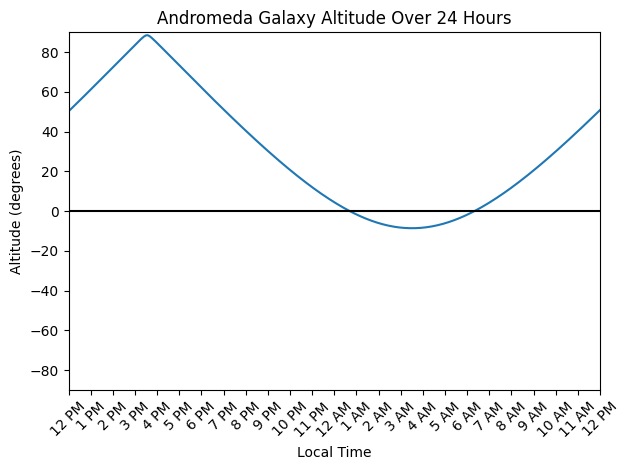

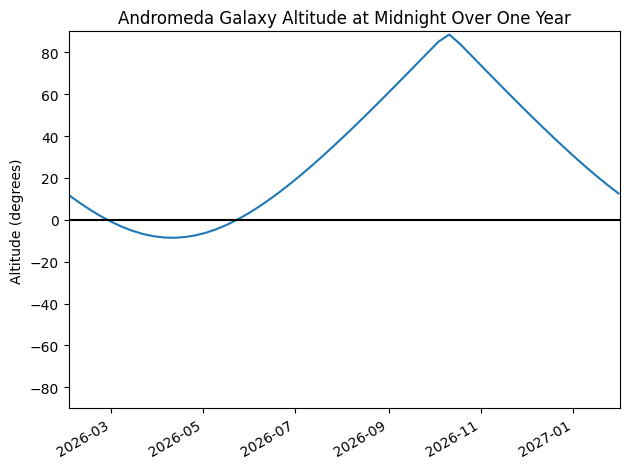

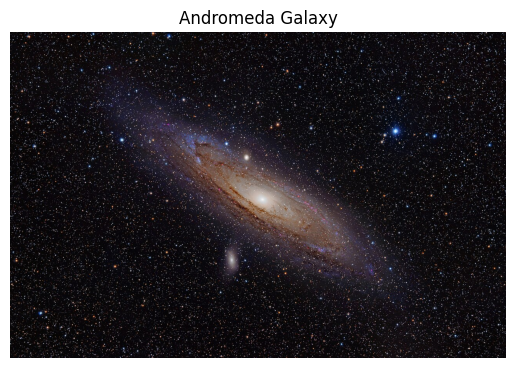

In [7]:
if __name__ == "__main__":
    obj = messier_31
    obs_date = "2026-02-15"
    obs_time = "0:00:00"
    latitude = 40.0
    longitude = -83.0
    utc_offset = -5
    
    altitude = calculate_altitude(
    obj,
    obs_date,
    obs_time,
    latitude,
    longitude,
    utc_offset
    )


    if altitude > 0:
        print(f"{obj.name} is {altitude:.2f}° above the horizon at {obs_time}")
    else:
        print(f"{obj.name} is {abs(altitude):.2f}° below the horizon at {obs_time}")

    plot_altitude_24hr(
        obj,
        obs_date,
        latitude,
        longitude,
        utc_offset
    )

    plot_altitude_year(
        obj,
        obs_date,
        latitude,
        longitude,
        utc_offset,
        step_days=7
    )
    if hasattr(obj, "image_url") and obj.image_url:
        try:
            req = Request(
                obj.image_url,
                headers={'User-Agent': 'Mozilla/5.0'}
            )

            with urlopen(req) as response:
                img = Image.open(response)
                plt.imshow(np.asarray(img))
                plt.axis('off')
                plt.title(obj.name)
                plt.show()

        except Exception as e:
            print(f"Could not load image: {e}")
    else:
        print("No image available.")